In [60]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
from sklearn.datasets import make_classification
x, y = make_classification(scale=1)

In [62]:
col = [str(i) for i in range(20)]

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()
lr

0.76

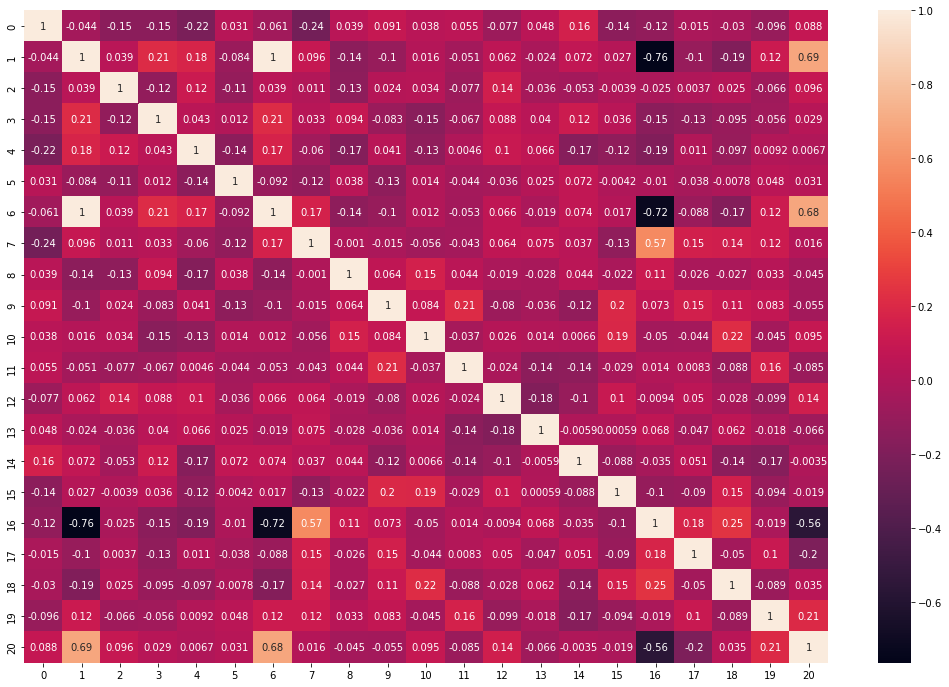

In [138]:
plt.rcParams['figure.figsize']=(18,12)
sns.heatmap(np.corrcoef(x.T, y.T), annot=True)

In [139]:
# Визуально выделил признаки, которые коррелируют с другими, а также имеют слабую корреляцию с таргетом (20 признак)
idx = [6, 7]
x_corr = np.delete(x, idx, axis=1)

In [154]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1.5)
x_th = selector.fit_transform(x)

In [156]:
x_th.shape[1]

3

In [142]:
corr, varT = cross_val_score(LogisticRegression(), x_corr, y, scoring='accuracy').mean(), cross_val_score(LogisticRegression(), x_th, y, scoring='accuracy').mean()
corr, varT

(0.78, 0.8699999999999999)

In [143]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_kb = SelectKBest(f_classif, k=5).fit_transform(x, y)
kbest = cross_val_score(LogisticRegression(), x_kb, y, scoring='accuracy').mean()
kbest

0.8400000000000001

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear', max_iter=1e6, warm_start=True), threshold=0.51, max_features=10).fit(x, y)
model_r = RandomForestClassifier(max_depth=100, min_samples_leaf=10, random_state=42)

In [145]:
pd.DataFrame({'importance' : sel.get_support()}).sort_values(by='importance', ascending=False)

,importance
18,True
17,True
16,True
6,True
12,True
0,False
11,False
15,False
14,False
13,False


In [146]:
model_r.fit(x, y)

RandomForestClassifier(max_depth=100, min_samples_leaf=10, random_state=42)

In [147]:
pd.DataFrame({'importance' : model_r.feature_importances_}).sort_values(by='importance', ascending=False)

,importance
1,0.276101
6,0.273130
16,0.195557
7,0.037650
3,0.026526
19,0.022546
17,0.019533
0,0.018394
2,0.017069
9,0.016692


In [149]:
x_l1 = x.T[[18, 17, 16, 6, 12]]
x_rf = x.T[[1, 6, 16, 7, 3]]
x_l1, x_rf = x_l1.T, x_rf.T
sfm, rf = cross_val_score(LogisticRegression(), x_l1, y, scoring='accuracy').mean(), cross_val_score(LogisticRegression(), x_rf, y, scoring='accuracy').mean()
sfm, rf

(0.8699999999999999, 0.8300000000000001)

In [150]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=LogisticRegression(penalty='l1', solver='liblinear', max_iter=1e6, warm_start=True), n_features_to_select=5).fit(x, y)

In [151]:
pd.DataFrame({'importance' : sfs.get_support()}).sort_values(by='importance', ascending=False)

,importance
17,True
5,True
6,True
7,True
1,True
0,False
12,False
18,False
16,False
15,False


In [152]:
x_sfs = x.T[[17, 5, 6, 7, 1]]
x_sfs = x_sfs.T
sfs_ = cross_val_score(LogisticRegression(), x_sfs, y, scoring='accuracy').mean()
sfs_

0.89

In [157]:
names = ['Logistic Regression', 'Correlation Matrix', 'Variance Threshold', 'Select K Best', 'Select From Model', 'Random Forest', 'Sequential Feature Selector']
counts = [20, 18, 3, 5, 5, 5, 5]
values = [lr, corr, varT, kbest, sfm, rf, sfs_]
pd.DataFrame({'method_name': names, 'count' : counts, 'importance' : values}).sort_values(by='importance', ascending=False)

,method_name,count,importance
6,Sequential Feature Selector,5,0.89
2,Variance Threshold,3,0.87
4,Select From Model,5,0.87
3,Select K Best,5,0.84
5,Random Forest,5,0.83
1,Correlation Matrix,18,0.78
0,Logistic Regression,20,0.76
